Part 1: Loading data (airbnb.csv)

In [64]:
import pandas as pd

%matplotlib inline

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (12,12)

airbnbs = pd.read_csv("data/airbnb.csv")

# column names are good, no need to change

airbnbs.to_csv("data/airbnb.1.initial_process.csv", index=False)

airbnbs

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0
6,29872,128698,Entire home/apt,Alcântara,25,5.0,2,1.0,75.0
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0


Part 2: Data Quality Assurance

In [65]:
airbnbs.room_id.value_counts()
airbnbs[airbnbs.duplicated()].shape
# no duplicates in room_id

(0, 9)

In [66]:
# check for duplicate values

n_records = len(airbnbs)
def duplicate_values_col(df):
    for column in df:
        column_counts = df[column].value_counts()
        most_common = column_counts.iloc[0]
        least_common = column_counts.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[column].name,
            round(most_common / (1.0 * n_records),3),
            round(least_common / (1.0 * n_records),3),
            df[column].dtype
        ))

duplicate_values_col(airbnbs)
# we see the most important (room_id and host_id) have low repetitivity

room_id | 0.0-0.0 | int64
host_id | 0.013-0.0 | int64
room_type | 0.738-0.013 | object
neighborhood | 0.211-0.002 | object
reviews | 0.175-0.0 | int64
overall_satisfaction | 0.348-0.0 | float64
accommodates | 0.303-0.001 | int64
bedrooms | 0.557-0.001 | float64
price | 0.059-0.0 | float64


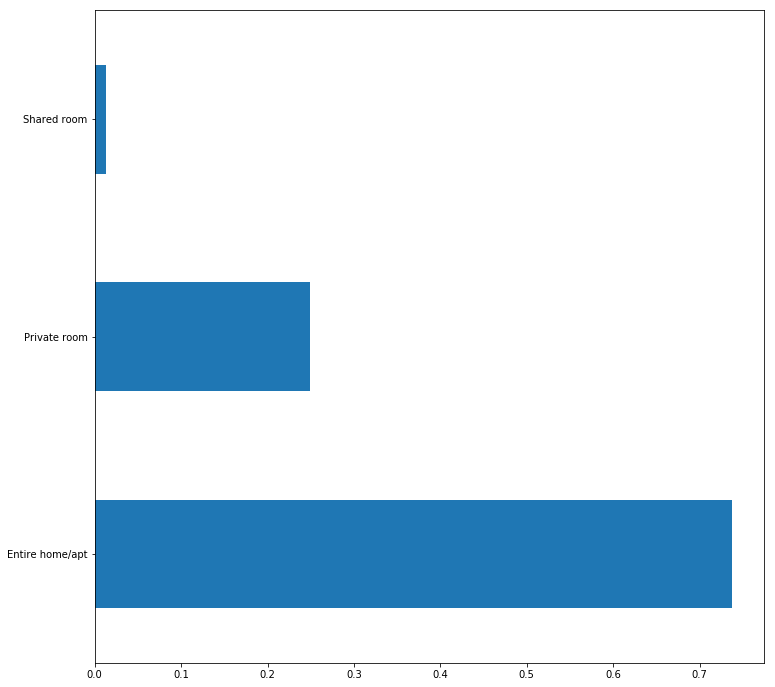

In [67]:
airbnbs.room_type.value_counts(normalize=True).plot.barh();
# we see that most listings are entire homes/apts
# room_type might have a cardinality issue (74%)

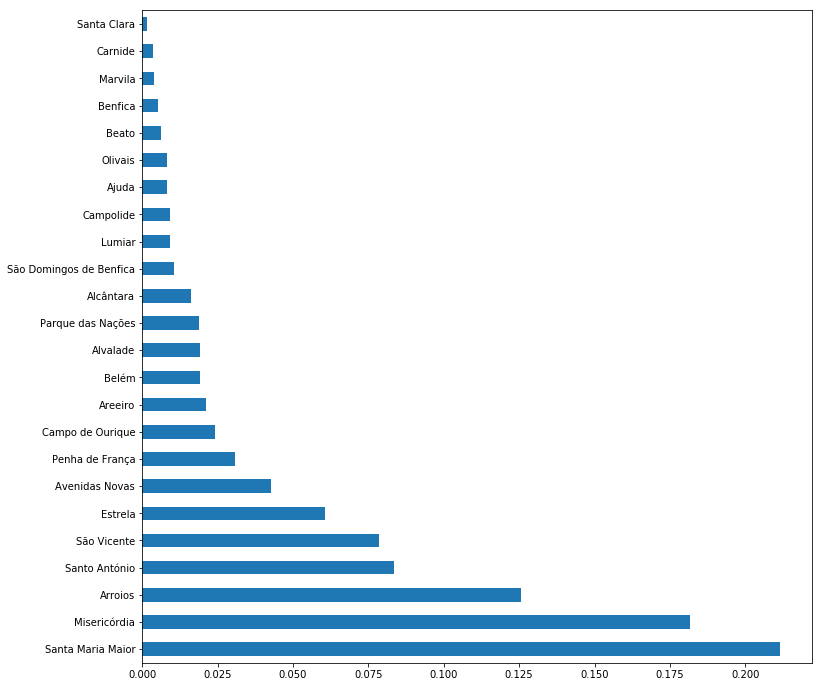

In [68]:
airbnbs.neighborhood.value_counts(normalize=True).plot.barh();
# we see that the listings are spread out among the same neighborhoods

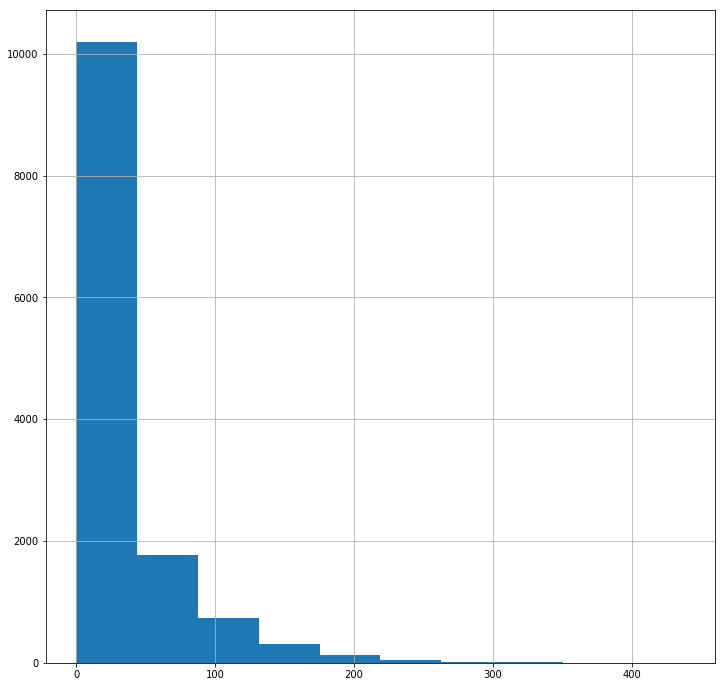

In [69]:
airbnbs.reviews.hist();
# we that most listings are under 50 except for some that are above

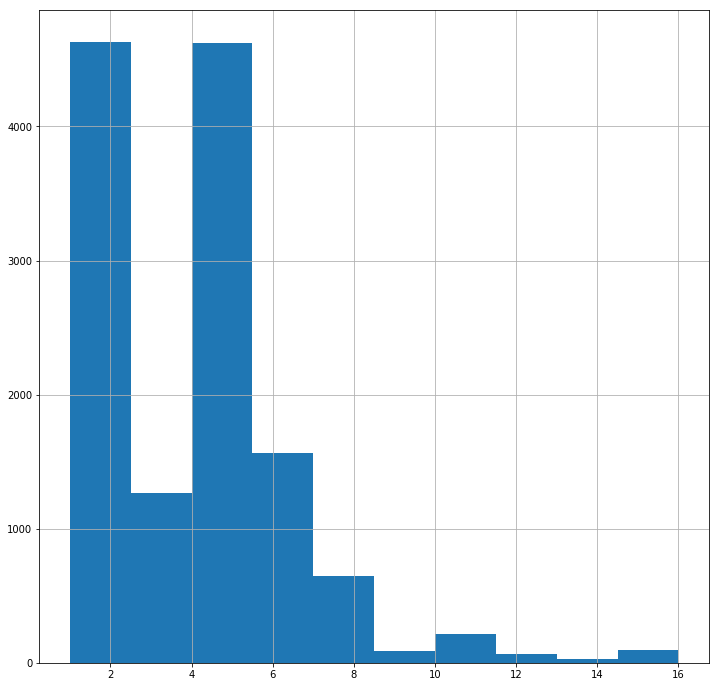

In [70]:
airbnbs.accommodates.hist();

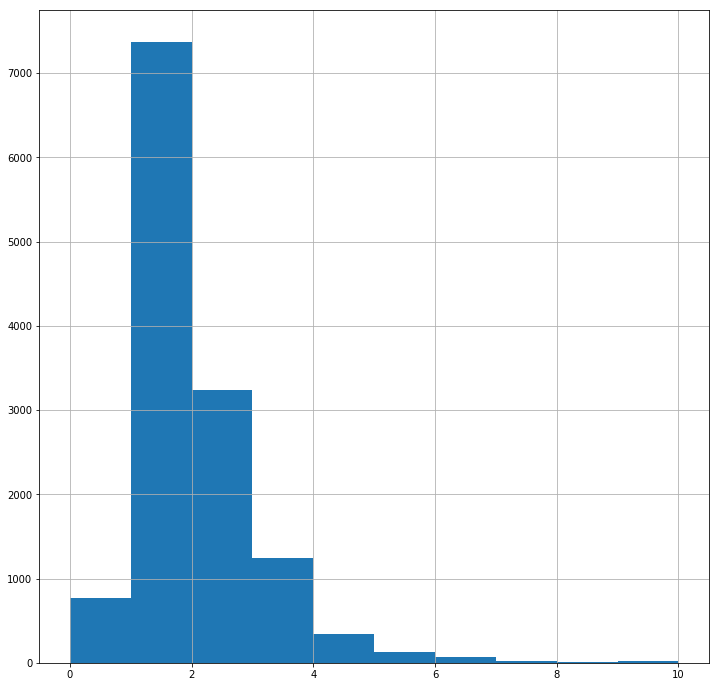

In [71]:
airbnbs.bedrooms.hist();
# all of these variables understandably are repetitive

In [72]:
# check for missing values

n_records = len(airbnbs)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(airbnbs)
# we see that only overall_satisfaction has missing values and the percentage is very low

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0007557436517533253 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64


In [73]:
# check for outliers in each column

from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[(np.abs(stats.zscore(df[column])) > 3)& \
                  (df[column].notnull())
                 ])
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(airbnbs)

# reviews, accommodates, bedrooms, and price have outliers

room_id | 0 | int64
host_id | 0 | int64
reviews | 296 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


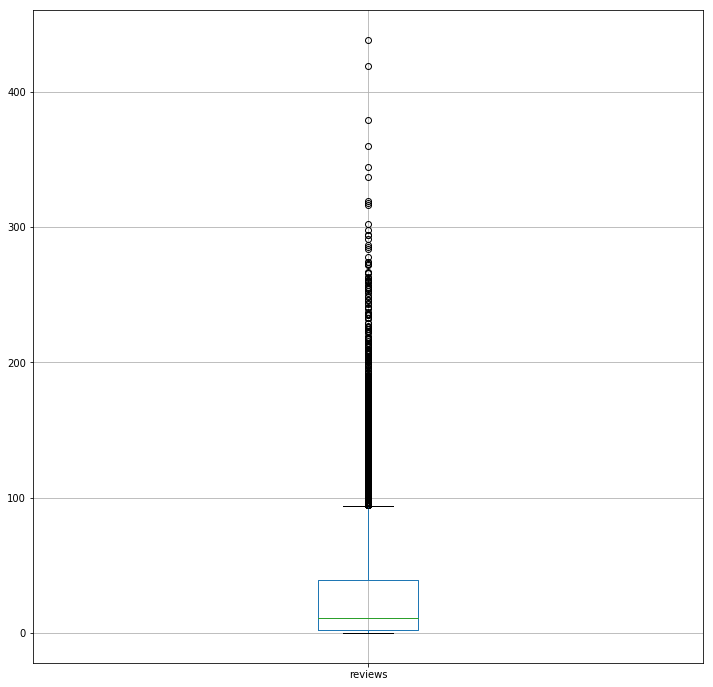

In [74]:
airbnbs.boxplot(column='reviews');

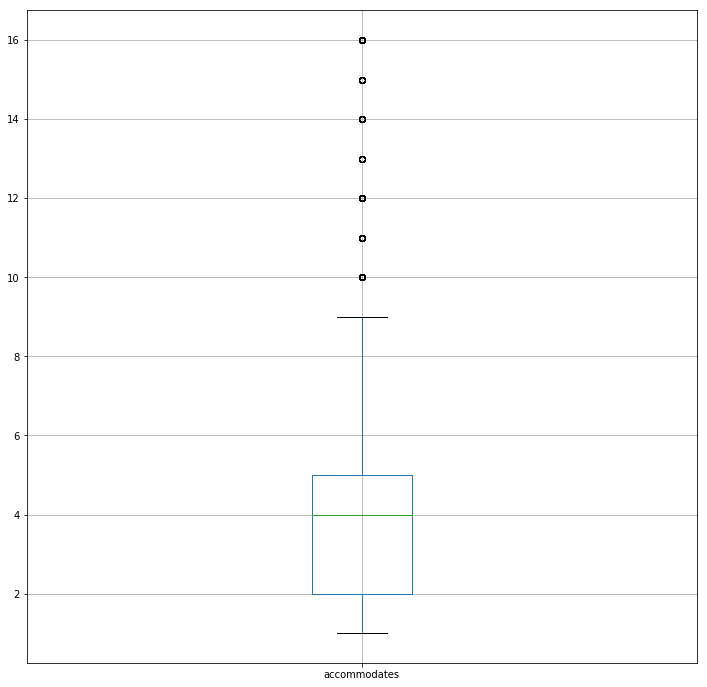

In [75]:
airbnbs.boxplot(column='accommodates');

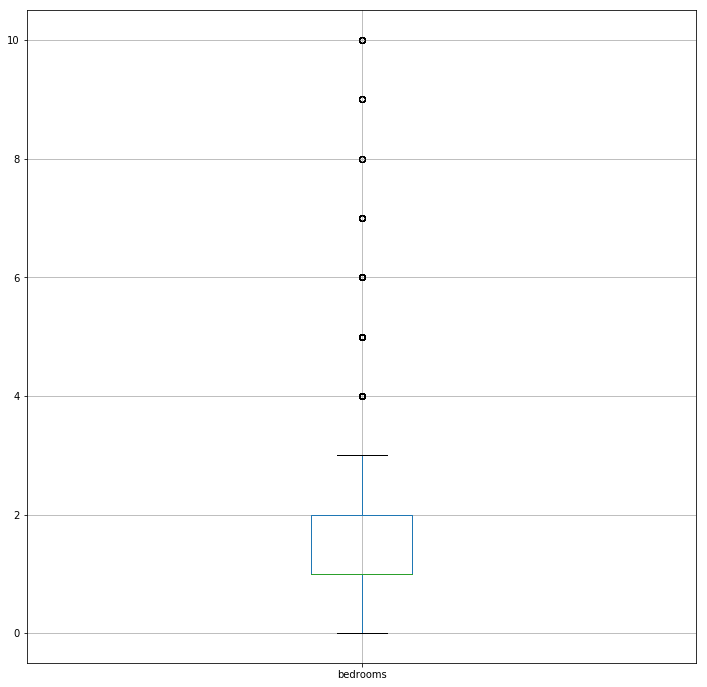

In [76]:
airbnbs.boxplot(column='bedrooms');

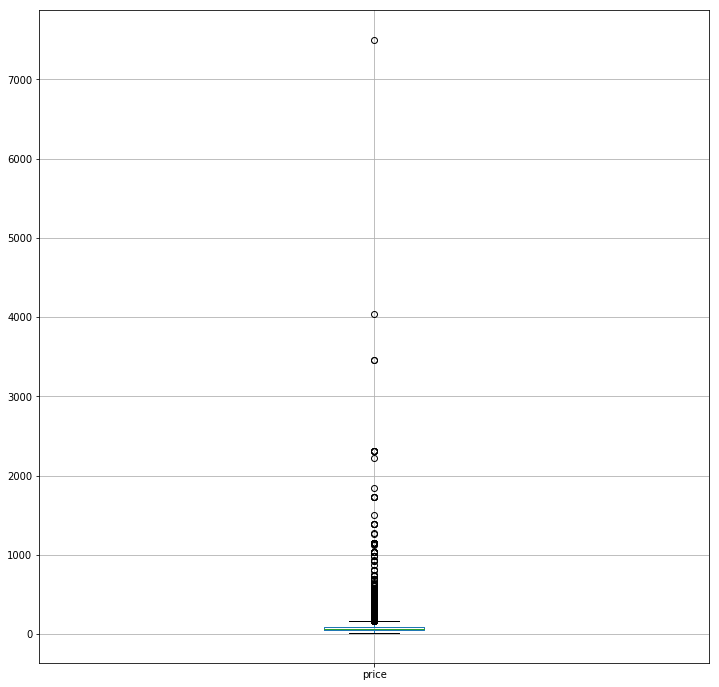

In [77]:
airbnbs.boxplot(column='price');

In [78]:
airbnbs[airbnbs.price==0].room_id.unique() # none which is good

airbnbs[airbnbs.bedrooms==0].room_type.unique()
# studio?? doesn't make sense because the listing type is entire home/apartment and private room

array(['Entire home/apt', 'Private room'], dtype=object)

In [79]:
better_airbnbs = airbnbs[airbnbs.bedrooms>0]
outliers_col(better_airbnbs) # less outliers but there still are

room_id | 0 | int64
host_id | 0 | int64
reviews | 281 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 114 | float64


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [80]:
better_airbnbs[
    np.abs(stats.zscore(better_airbnbs.bedrooms)) > 3
].room_type.value_counts(normalize=True)
# there are still outliers so it's okay

Entire home/apt    0.953488
Private room       0.046512
Name: room_type, dtype: float64

In [81]:
missing_values_df(better_airbnbs)
# much lower percentage

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0006045949214026602 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64


In [82]:
# no changes made
# there are listings with no bedrooms which I believe are studios
better_airbnbs.to_csv("data/airbnb.2.clean.csv", index=False)

Part 3: Variable Grouping

In [108]:
airbnbs = pd.read_csv("data/airbnb.2.clean.csv")

def cardinality_categorical(df):
    n_records = len(df)
    for column in df.select_dtypes([object]):
        print("{} | uniques/records: {:.3f} | Minimum observations: {:.3f}".format(
            column, 
            len(df[column].unique())/n_records,
            df[column].value_counts().min()
        ))        

cardinality_categorical(airbnbs)
# we can't really group anything here

room_type | uniques/records: 0.000 | Minimum observations: 171.000
neighborhood | uniques/records: 0.002 | Minimum observations: 23.000


In [109]:
review_type = ['very few', "few",  "medium", "many", "very many"]
airbnbs['review_type'] = pd.qcut(airbnbs['reviews'], 5, review_type)
airbnbs

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,review_type
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,medium
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,very few
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,very many
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,very many
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,very many
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0,medium
6,29872,128698,Entire home/apt,Alcântara,25,5.0,2,1.0,75.0,many
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0,many
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0,many
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0,many


In [110]:
price_type = ["very cheap", "cheap", "medium", "expensive", "very expensive"]
airbnbs['price_type'] = pd.qcut(airbnbs['price'], 5, price_type)
airbnbs

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,review_type,price_type
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,medium,cheap
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,very few,cheap
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,very many,medium
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,very many,cheap
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,very many,medium
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0,medium,very expensive
6,29872,128698,Entire home/apt,Alcântara,25,5.0,2,1.0,75.0,many,medium
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0,many,cheap
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0,many,cheap
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0,many,medium


In [111]:
accommodate_type = ["very few", "few", "medium", "many", "very many"]
airbnbs['accommodate_type'] = pd.qcut(airbnbs['accommodates'], 5, accommodate_type)
airbnbs

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,review_type,price_type,accommodate_type
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,medium,cheap,very few
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,very few,cheap,very few
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,very many,medium,few
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,very many,cheap,medium
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,very many,medium,medium
5,29720,128075,Entire home/apt,Estrela,14,5.0,16,9.0,1154.0,medium,very expensive,very many
6,29872,128698,Entire home/apt,Alcântara,25,5.0,2,1.0,75.0,many,medium,very few
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0,many,cheap,few
8,29915,128890,Entire home/apt,Avenidas Novas,28,4.5,3,1.0,58.0,many,cheap,few
9,33312,144398,Entire home/apt,Misericórdia,24,4.5,4,1.0,66.0,many,medium,medium


In [114]:
airbnbs.dtypes

room_id                    int64
host_id                    int64
room_type                 object
neighborhood              object
reviews                    int64
overall_satisfaction     float64
accommodates               int64
bedrooms                 float64
price                    float64
review_type             category
price_type              category
accommodate_type        category
dtype: object

In [115]:
airbnbs.to_pickle("data/airbnb.3.grouped.pkl")